In [14]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d tongpython/cat-and-dog
!unzip -q cat-and-dog.zip -d cat_and_dog


Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0


In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

image_size = (64, 64)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    zoom_range=0.2,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 6404 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.


In [17]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), strides=2, padding='same', activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 544,066 (2.08 MB)

 Trainable params: 544,066 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


201/201 ━━━━━━━━━━━━━━━━━━━━ 28s 121ms/step - accuracy: 0.5338 - loss: 0.6956 - val_accuracy: 0.6059 - val_loss: 0.6569
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 18s 91ms/step - accuracy: 0.6446 - loss: 0.6344 - val_accuracy: 0.6590 - val_loss: 0.6198
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.6768 - loss: 0.5929 - val_accuracy: 0.6902 - val_loss: 0.5877
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - accuracy: 0.7145 - loss: 0.5616 - val_accuracy: 0.7089 - val_loss: 0.5534
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.7309 - loss: 0.5377 - val_accuracy: 0.7289 - val_loss: 0.5367
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 18s 89ms/step - accuracy: 0.7538 - loss: 0.5084 - val_accuracy: 0.7520 - val_loss: 0.4981
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 18s 91ms/step - accuracy: 0.7565 - loss: 0.4948 - val_accuracy: 0.7620 - val_loss: 0.5012
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.7610 - loss: 0.5012 - val_accura

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


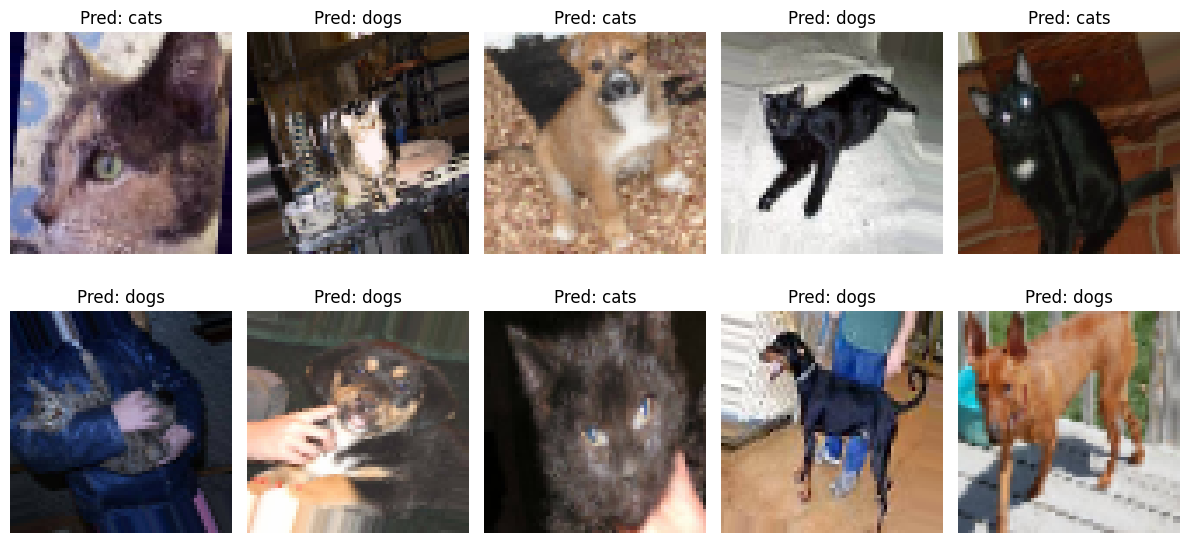

In [19]:
import numpy as np
import matplotlib.pyplot as plt
class_names = list(train_generator.class_indices.keys())

x, y = next(val_generator)
preds = model.predict(x[:10])
predicted_labels = np.argmax(preds, axis=1)

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x[i])
    plt.title(f"Pred: {class_names[predicted_labels[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [20]:
val_loss, val_acc = model.evaluate(val_generator)
print(f"\nValidation Accuracy: {val_acc:.2f}")

51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.7249 - loss: 0.5281

Validation Accuracy: 0.72
